In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('ToyotaCorolla.csv',encoding='latin1')

In [3]:
pd.set_option('display.max_columns', None)
df
#Consider only the below columns and prepare a prediction model for predicting Price.
#Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,Blue,0,1300,3,4,5,69,1025,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,Grey,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [4]:
df = df[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight","Price"]]

In [5]:
df1= df.rename({'Age_08_04':'age','Quarterly_Tax':'qt'},axis=1)

In [6]:
df1

,age,KM,HP,cc,Doors,Gears,qt,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500
1434,70,16916,86,1300,3,5,69,1015,7250


In [7]:

df1.describe()

,age,KM,HP,cc,Doors,Gears,qt,Weight,Price
count,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000
mean,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961,10730.824513
std,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112,3626.964585
min,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000,4350.000000
25%,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000,8450.000000
50%,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000,9900.000000
75%,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000,11950.000000
max,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000,32500.000000


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     1436 non-null   int64
 1   KM      1436 non-null   int64
 2   HP      1436 non-null   int64
 3   cc      1436 non-null   int64
 4   Doors   1436 non-null   int64
 5   Gears   1436 non-null   int64
 6   qt      1436 non-null   int64
 7   Weight  1436 non-null   int64
 8   Price   1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [9]:

df1.corr()

,age,KM,HP,cc,Doors,Gears,qt,Weight,Price
age,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253,-0.876590
KM,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598,-0.569960
HP,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614,0.314990
cc,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637,0.126389
Doors,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618,0.185326
Gears,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613,0.063104
qt,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134,0.219197
Weight,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000,0.581198
Price,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198,1.000000


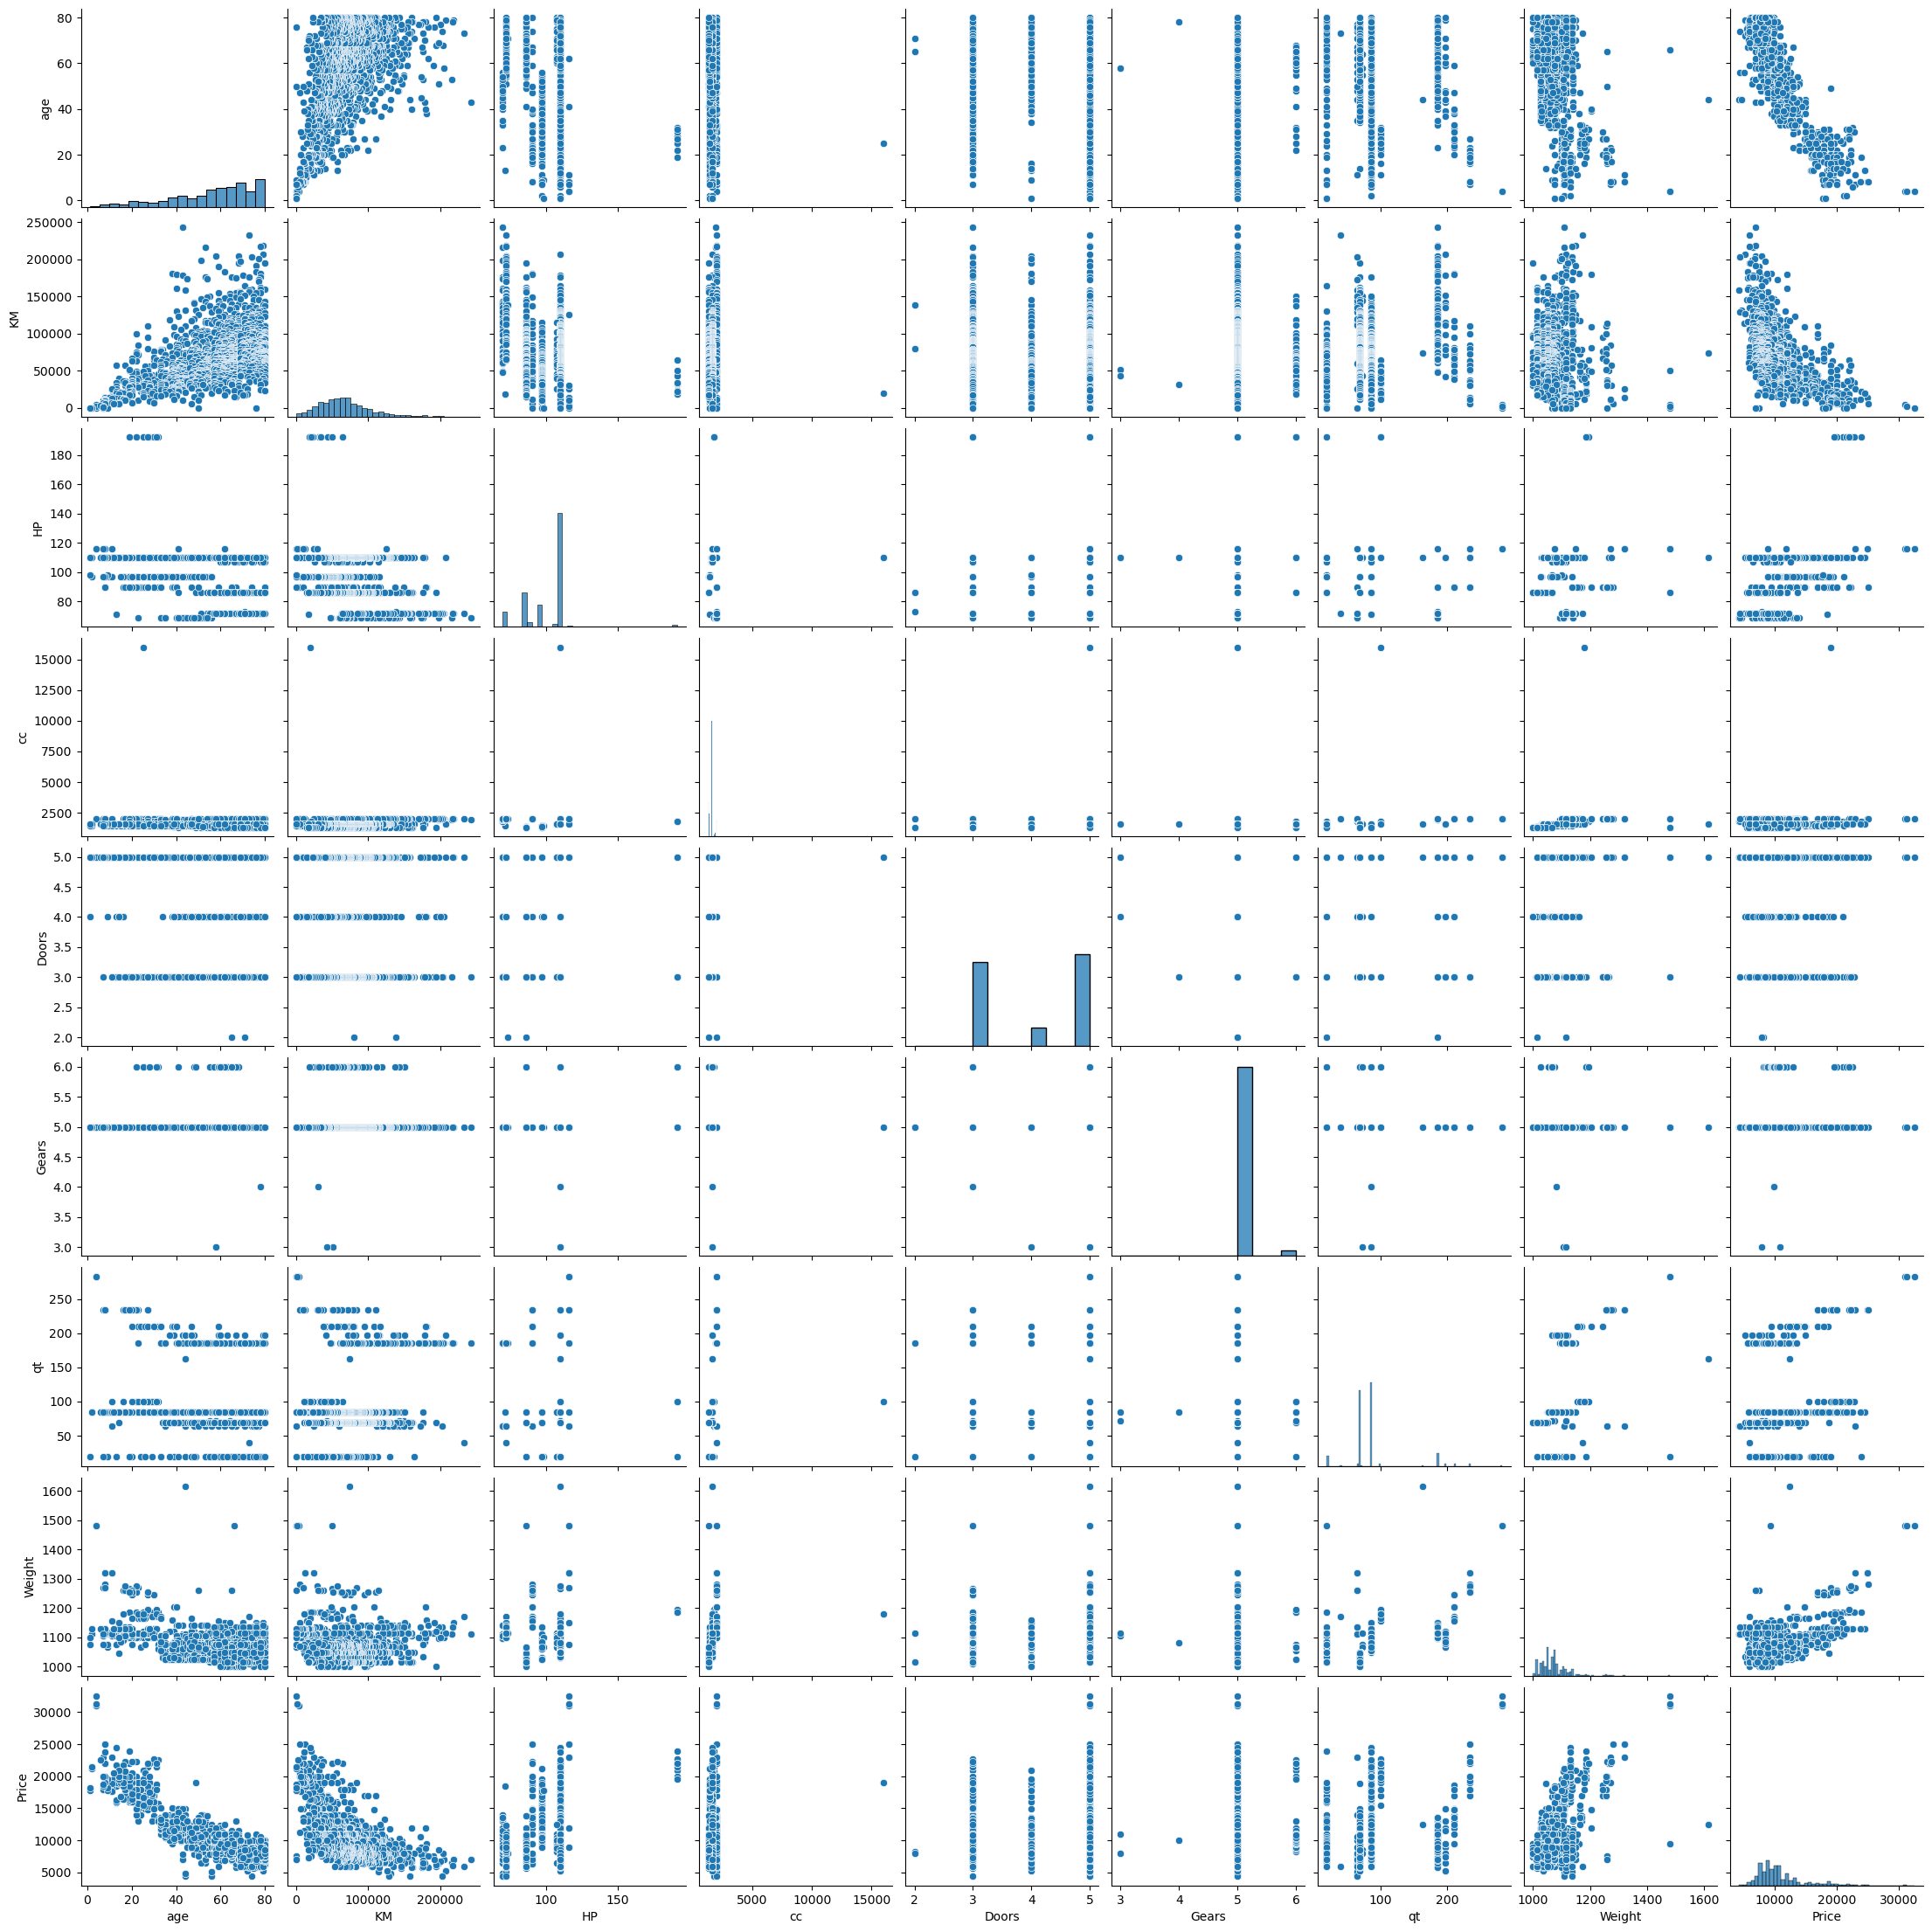

In [10]:
sns.pairplot(df1)

In [11]:
import statsmodels.formula.api as smf


In [12]:
ols = smf.ols('Price~age+KM+HP+cc+Doors+Gears+qt+Weight',data=df1)

In [13]:
model = ols.fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:52:55   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
qt             3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#Lets check is there any duplicates in the data
df1[df1.duplicated()]

,age,KM,HP,cc,Doors,Gears,qt,Weight,Price
113,8,13253,116,2000,5,5,234,1320,24950


In [16]:
#Dropping the duplicates 
df2= df1.drop_duplicates().reset_index(drop=True)

In [17]:
df2[df2.duplicated()]
#Now there is no duplicated row

,age,KM,HP,cc,Doors,Gears,qt,Weight,Price


In [18]:
df2

,age,KM,HP,cc,Doors,Gears,qt,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1430,69,20544,86,1300,3,5,69,1025,7500
1431,72,19000,86,1300,3,5,69,1015,10845
1432,71,17016,86,1300,3,5,69,1015,8500
1433,70,16916,86,1300,3,5,69,1015,7250


In [19]:
import statsmodels.formula.api as smf

ols = smf.ols('Price~age+KM+HP+cc+Doors+Gears+qt+Weight',data=df2)

model1 = ols.fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:53:39   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
qt             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
#R-Squared has been decreased after the removal of duplicated row

<Axes: xlabel='Price', ylabel='Count'>

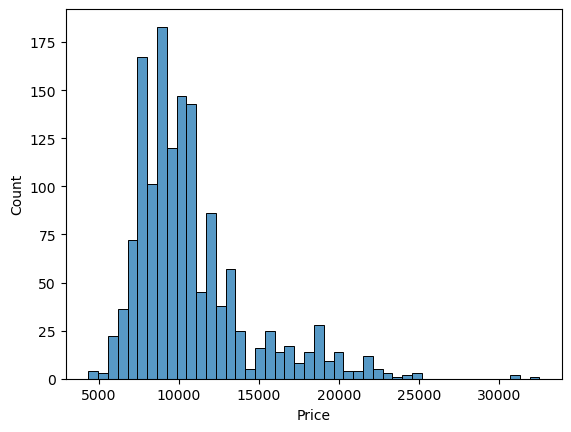

In [21]:
sns.histplot(df1['Price'])
# Target column is right skewed ,there are outliers on maximum side of the data

In [22]:
 a = df2[df2['Price']>30000]
# There are 3 outliers in target column ,lets drop them and check the accuracy 

In [23]:
a

,age,KM,HP,cc,Doors,Gears,qt,Weight,Price
109,4,1,116,2000,5,5,283,1480,32500
110,4,4000,116,2000,5,5,283,1480,31000
111,4,1500,116,2000,5,5,283,1480,31275


In [24]:
df3 = df2.drop(df2[df2['Price'] > 30000].index)


In [25]:
df3 =df3.reset_index(drop=True)

In [26]:
df3.head(112)

,age,KM,HP,cc,Doors,Gears,qt,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
107,17,10000,97,1400,3,5,85,1100,17450
108,20,7187,110,1600,3,5,85,1105,17950
109,8,13253,116,2000,5,5,234,1320,24950
110,7,10000,116,2000,5,5,234,1270,22950


<Axes: xlabel='Price', ylabel='Count'>

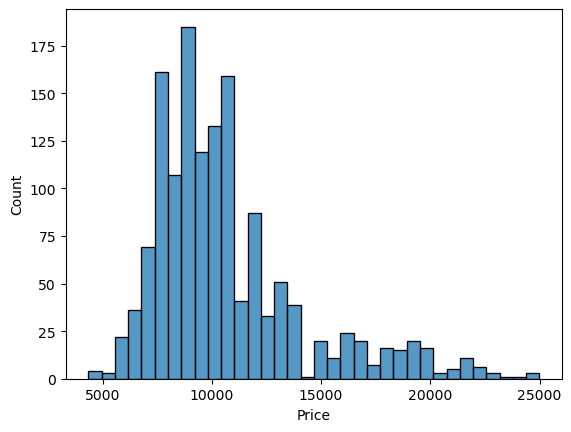

In [27]:
sns.histplot(df3['Price'])

In [28]:
model2 = smf.ols('Price~age+KM+HP+cc+Doors+Gears+qt+Weight',data=df3).fit()

In [29]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     1071.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:54:01   Log-Likelihood:                -12315.
No. Observations:                1432   AIC:                         2.465e+04
Df Residuals:                    1423   BIC:                         2.470e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3249.5051   1419.744     -2.289      0.022   -6034.522    -464.488
age         -123.8745      2.585    -47.919      0.000    -128.946    -118.804
KM            -0.0196      0.001    -15.830      0.000      -0.022      -0.017
HP            31.4018      2.768     11.345      0.000      25.972      36.831
cc            -0.0649      0.089     -0.731      0.465      -0.239       0.109
Doors         20.6082     39.390      0.523      0.601     -56.661      97.878
Gears        634.7170    193.554      3.279      0.001     255.036    1014.398
qt             3.4976      1.288      2.715      0.007       0.970       6.025
Weight        14.5256      1.097     13.238      0.000      12.373      16.678
==============================================================================
Omnibus:                      110.319   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              548.031
Skew:                          -0.123   Prob(JB):                    9.92e-120
Kurtosis:                       6.021   Cond. No.                     3.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# R2 score and adjR2 score has been decreased after the removal of outlier

In [31]:
df4 = np.sqrt(df2)

<Axes: xlabel='Price', ylabel='Count'>

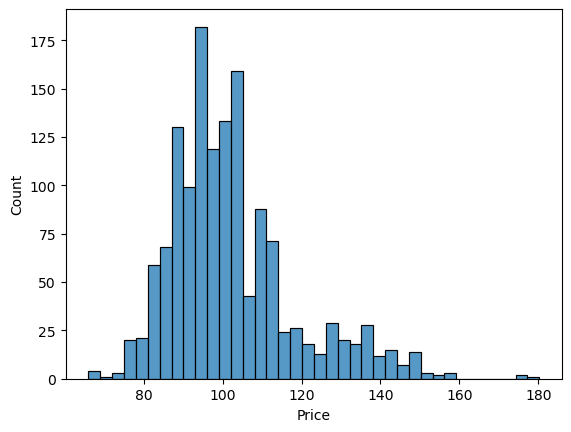

In [32]:
sns.histplot(df4['Price'])

In [33]:
model3 = smf.ols('Price~age+KM+HP+cc+Doors+Gears+qt+Weight',data=df4).fit()

In [34]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1135.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:54:09   Log-Likelihood:                -4584.7
No. Observations:                1435   AIC:                             9187.
Df Residuals:                    1426   BIC:                             9235.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.8289     12.615     -0.462      0.644     -30.574      18.916
age           -7.3419      0.163    -45.003      0.000      -7.662      -7.022
KM            -0.0436      0.003    -14.498      0.000      -0.050      -0.038
HP             3.2812      0.247     13.299      0.000       2.797       3.765
cc            -0.1396      0.059     -2.385      0.017      -0.254      -0.025
Doors          0.9717      0.701      1.386      0.166      -0.403       2.347
Gears         16.0257      3.920      4.089      0.000       8.337      23.714
qt             0.6443      0.110      5.865      0.000       0.429       0.860
Weight         3.1101      0.318      9.778      0.000       2.486       3.734
==============================================================================
Omnibus:                      123.614   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              435.791
Skew:                          -0.373   Prob(JB):                     2.34e-95
Kurtosis:                       5.595   Cond. No.                     2.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# R-squared has been increased after the sqrt transformation

In [36]:
df5 = np.log(df2)

<Axes: xlabel='Price', ylabel='Count'>

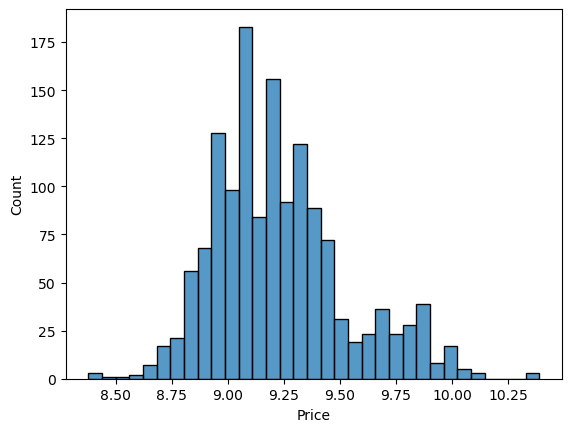

In [37]:
sns.histplot(df5['Price'])

In [38]:
model5 = smf.ols('Price~age+KM+HP+Gears+qt+Weight',data=df5).fit()

In [39]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     713.1
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:54:19   Log-Likelihood:                 708.22
No. Observations:                1435   AIC:                            -1402.
Df Residuals:                    1428   BIC:                            -1366.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4622      0.797      5.596      0.000       2.898       6.026
age           -0.4550      0.012    -39.504      0.000      -0.478      -0.432
KM             0.0135      0.005      2.709      0.007       0.004       0.023
HP             0.4187      0.028     14.780      0.000       0.363       0.474
Gears          0.2664      0.107      2.488      0.013       0.056       0.476
qt             0.0417      0.011      3.902      0.000       0.021       0.063
Weight         0.5550      0.113      4.911      0.000       0.333       0.777
==============================================================================
Omnibus:                      382.201   Durbin-Watson:                   1.225
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1848.222
Skew:                          -1.168   Prob(JB):                         0.00
Kurtosis:                       8.046   Cond. No.                     3.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
#Lets check the multi colinearity using vif

In [41]:
df1.head()

,age,KM,HP,cc,Doors,Gears,qt,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


In [42]:
age_rsq = smf.ols('age~KM+HP+cc+Doors+Gears+qt+Weight',data=df2).fit().rsquared
vif_age = 1/(1-age_rsq)

KM_rsq = smf.ols('KM~age+HP+cc+Doors+Gears+qt+Weight',data=df2).fit().rsquared
vif_KM = 1/(1-KM_rsq)

HP_rsq = smf.ols('HP~KM+age+cc+Doors+Gears+qt+Weight',data=df2).fit().rsquared
vif_HP = 1/(1-HP_rsq)

cc_rsq = smf.ols('cc~KM+HP+age+Doors+Gears+qt+Weight',data=df2).fit().rsquared
vif_cc = 1/(1-cc_rsq)

Doors_rsq = smf.ols('Doors~KM+HP+cc+age+Gears+qt+Weight',data=df2).fit().rsquared
vif_Doors = 1/(1-Doors_rsq)

Gears_rsq = smf.ols('Gears~KM+HP+cc+Doors+age+qt+Weight',data=df2).fit().rsquared
vif_Gears = 1/(1-Gears_rsq)

qt_rsq = smf.ols('qt~KM+HP+cc+Doors+Gears+age+Weight',data=df2).fit().rsquared
vif_qt = 1/(1-qt_rsq)

Weight_rsq = smf.ols('Weight~KM+HP+cc+Doors+Gears+qt+age',data=df2).fit().rsquared
vif_weight = 1/(1-Weight_rsq)


In [43]:
vif_df = {'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
           'Vif':[vif_age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_qt,vif_weight]}
pd.DataFrame(vif_df)

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [44]:
# There is no such multicolineartity in the variables.
#so we can use every single feature.

# Residual Analysis

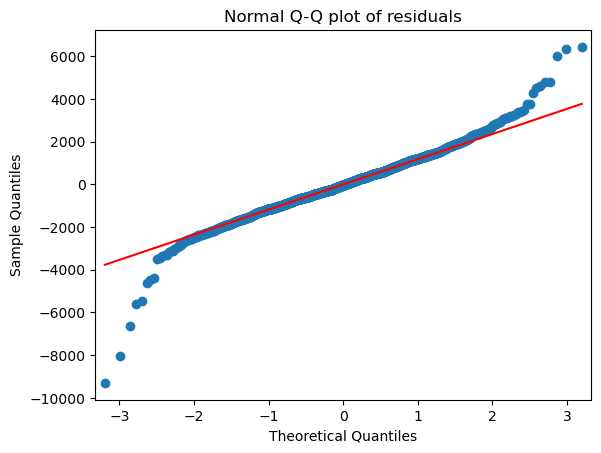

In [45]:
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model1.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [46]:
list(np.where(model1.resid>6000))  # outliar detection from above QQ plot of residuals

[array([109, 146, 522], dtype=int64)]

In [47]:
list(np.where(model1.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [48]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

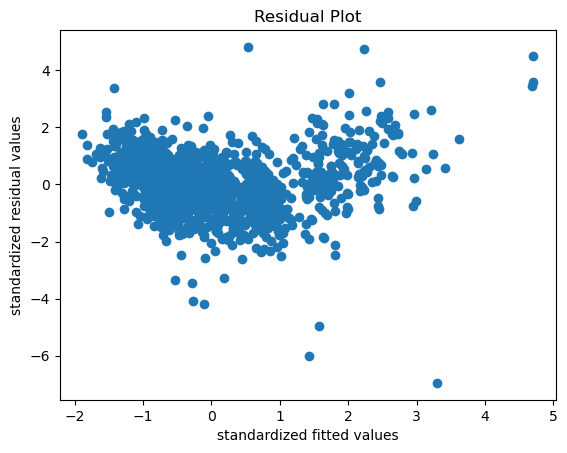

In [49]:
plt.scatter(standard_values(model1.fittedvalues),standard_values(model1.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [50]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

eval_env: 1


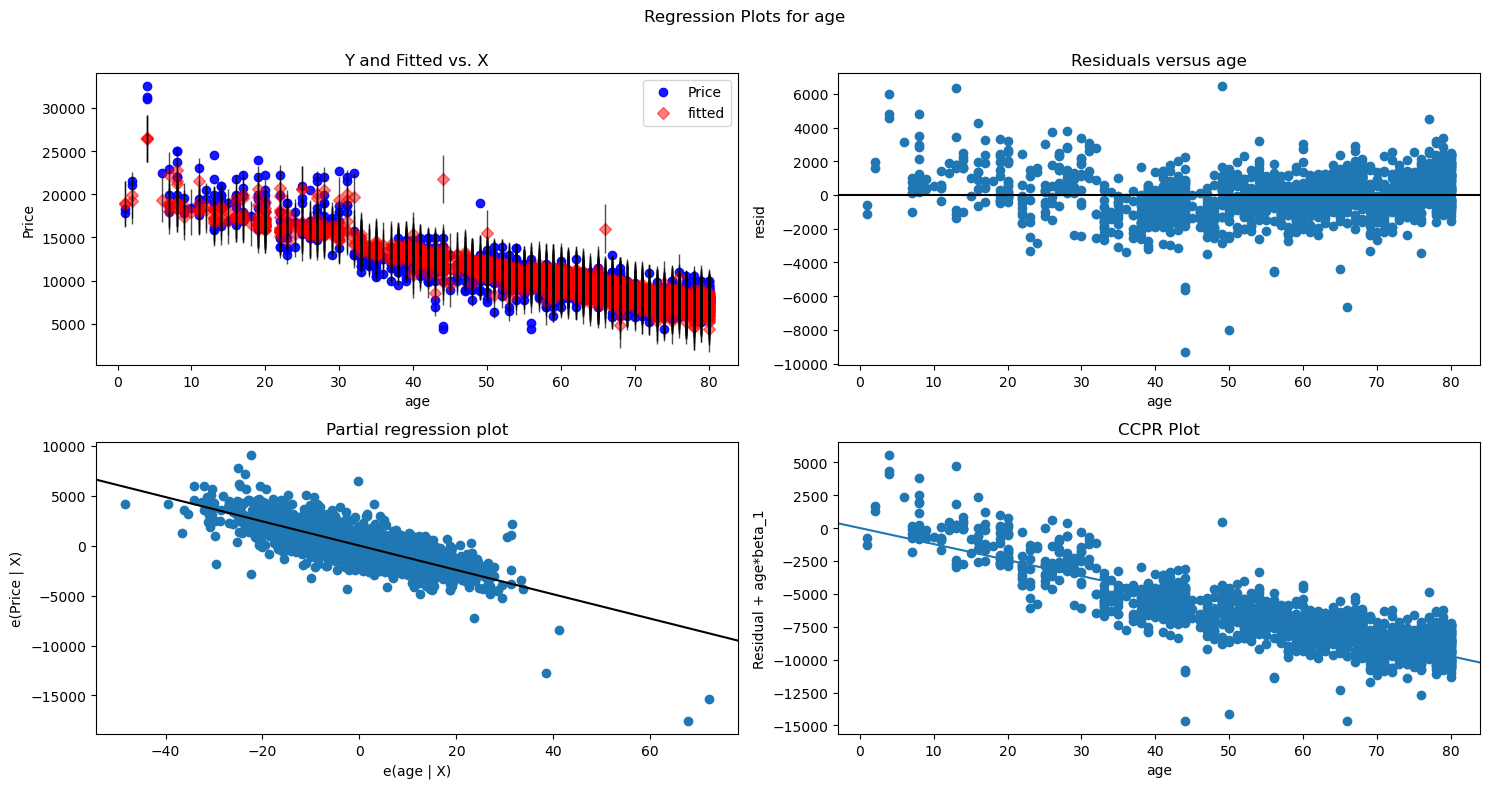

In [51]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'age',fig=fig)
plt.show()

eval_env: 1


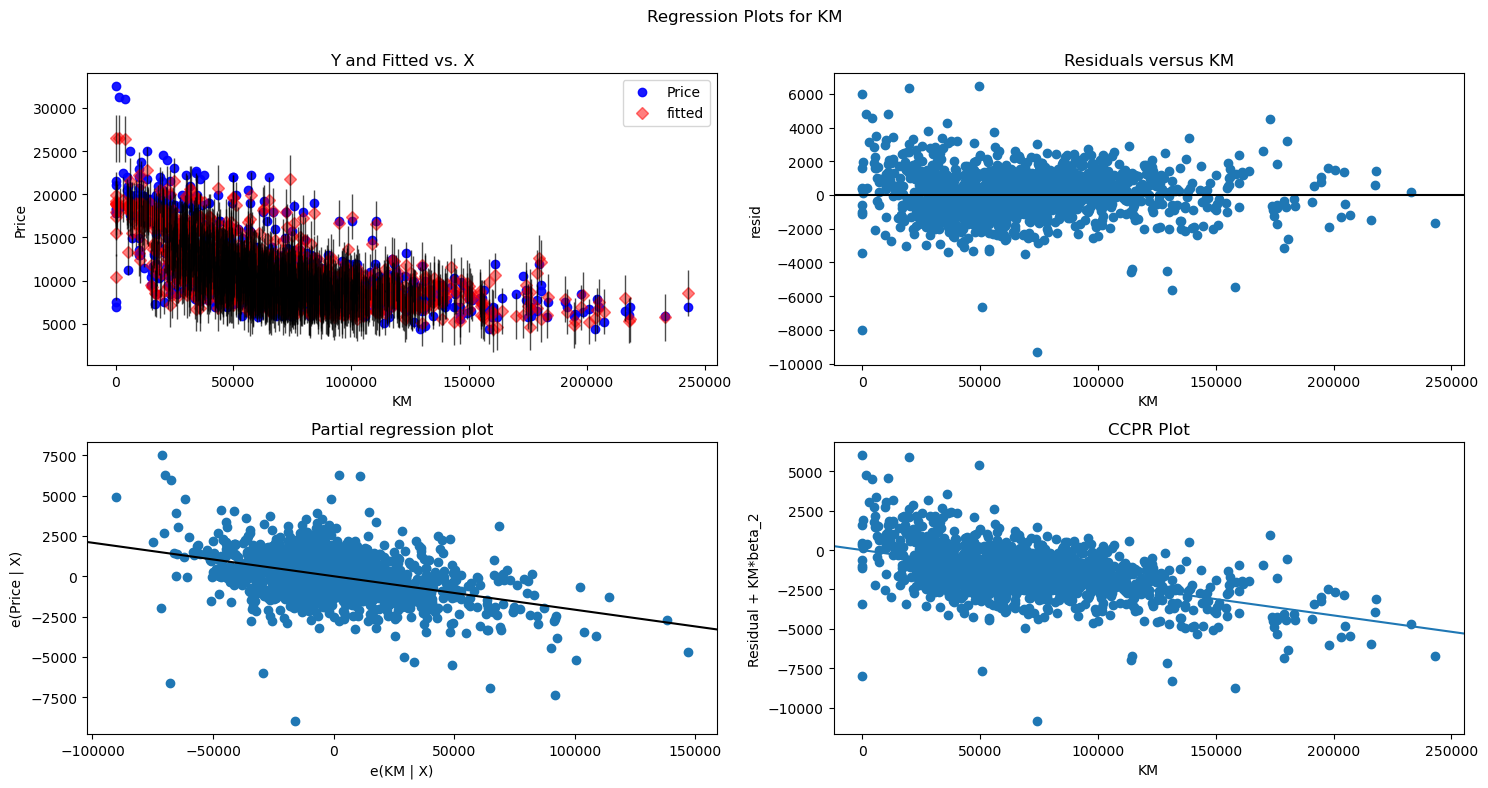

In [52]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'KM',fig=fig)
plt.show()


eval_env: 1


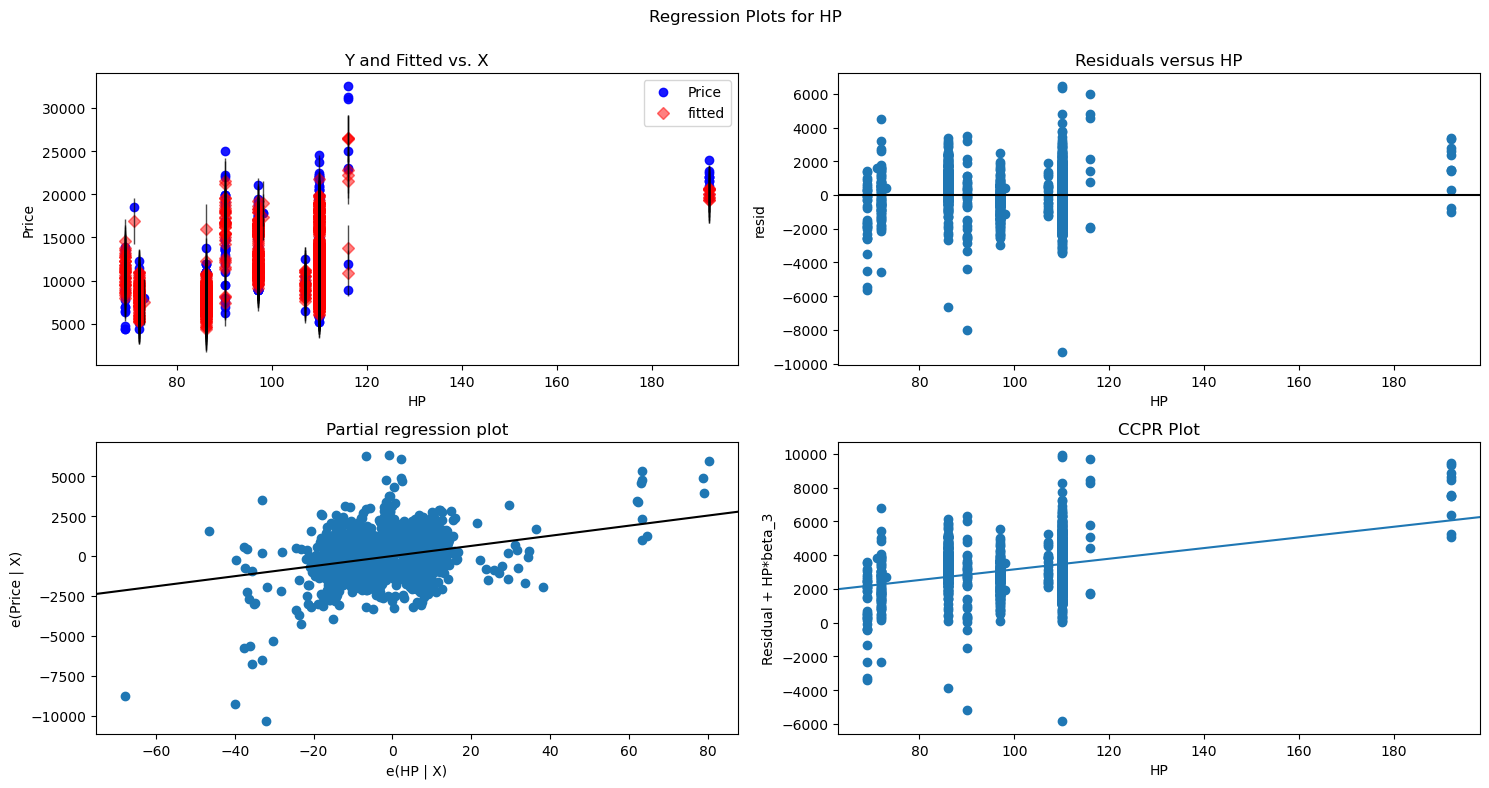

In [53]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'HP',fig=fig)
plt.show()

eval_env: 1


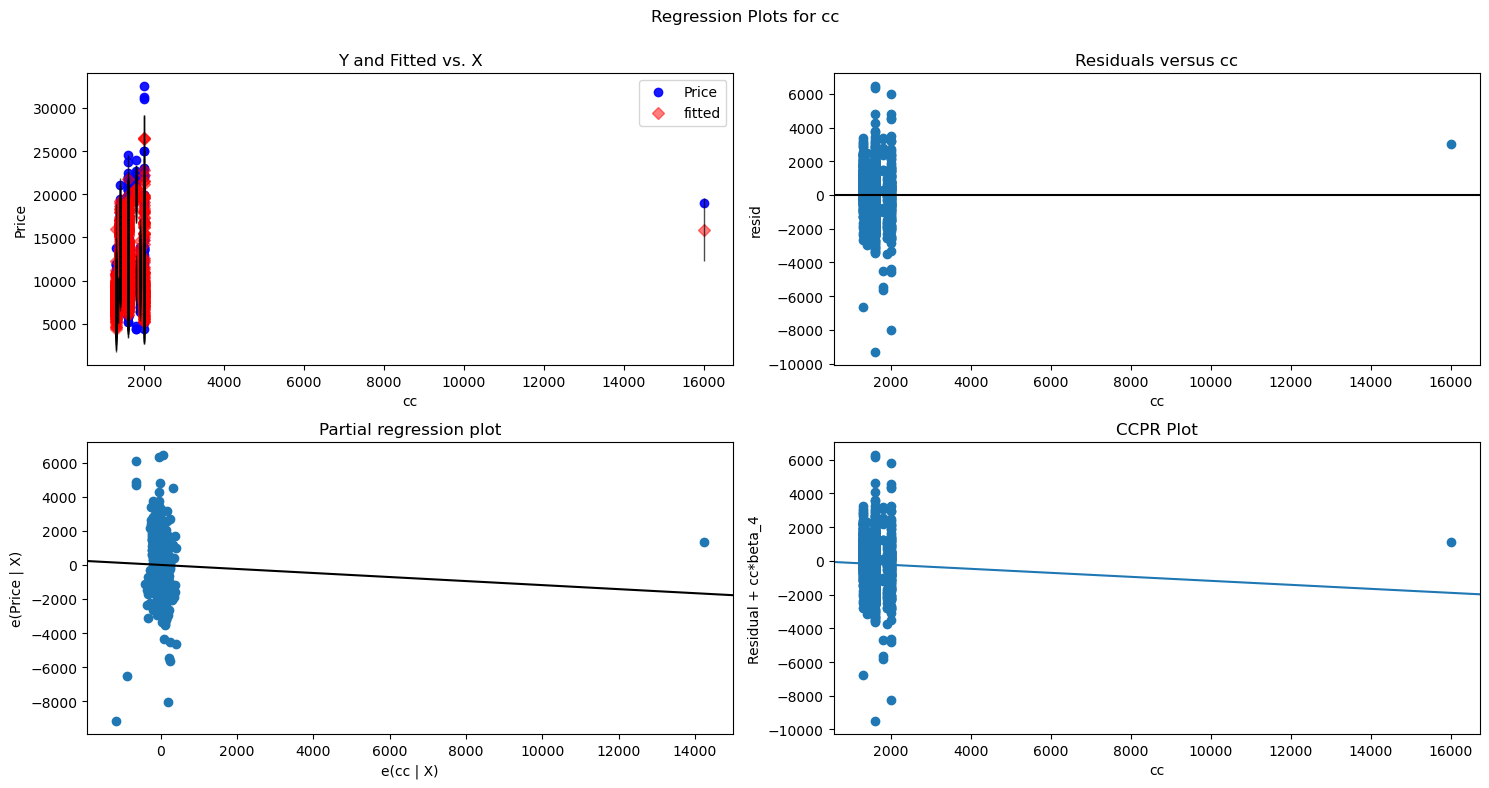

In [54]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'cc',fig=fig)
plt.show()

eval_env: 1


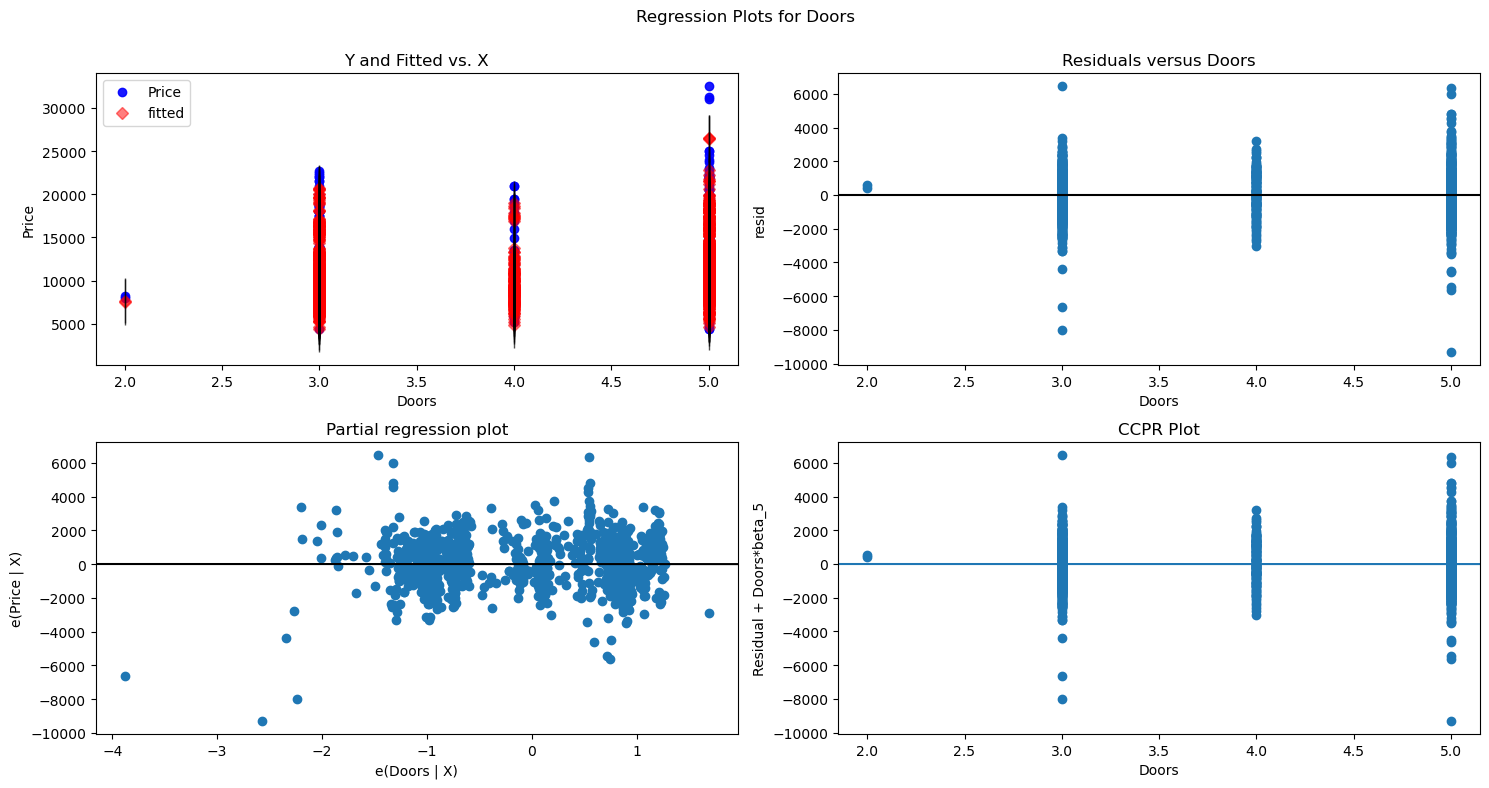

In [55]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'Doors',fig=fig)
plt.show()



eval_env: 1


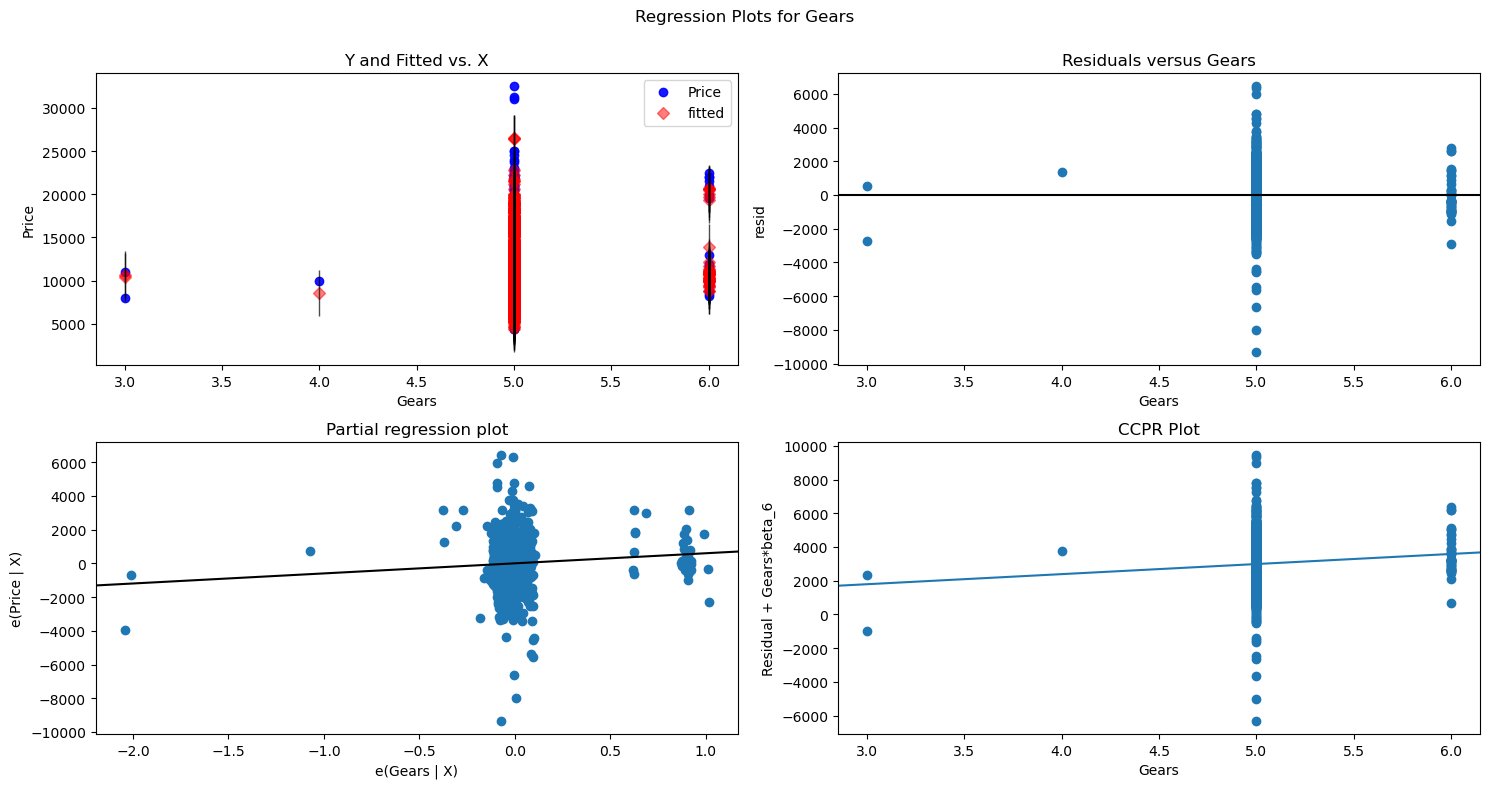

In [56]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'Gears',fig=fig)
plt.show()


eval_env: 1


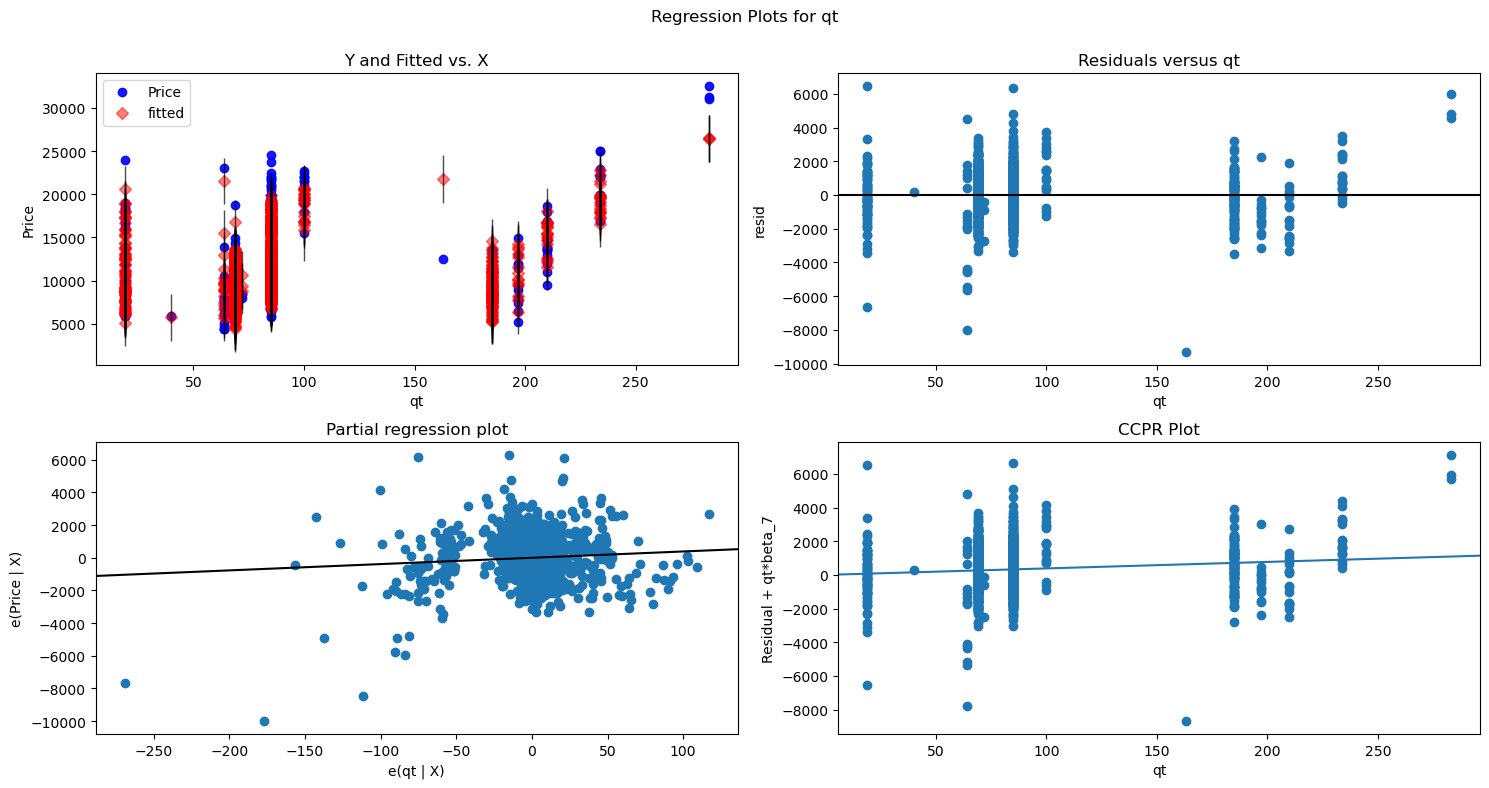

In [57]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'qt',fig=fig)
plt.show()


eval_env: 1


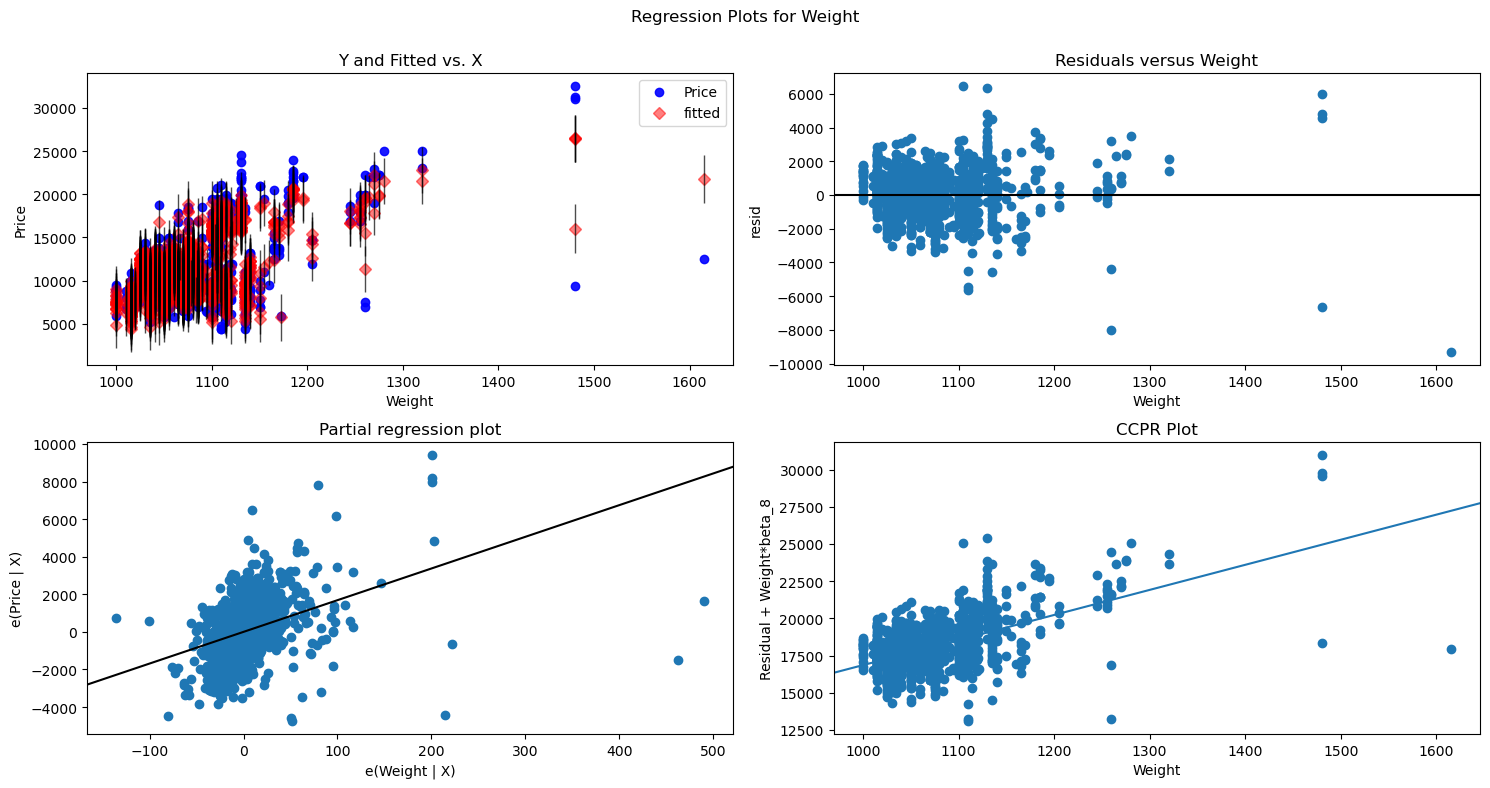

In [58]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'Weight',fig=fig)
plt.show()


# MODEL DELETION METHOD

In [59]:
model_influence = model1.get_influence()

In [60]:
(c,_) = model_influence.cooks_distance

In [61]:
    len(df2)

1435

<StemContainer object of 3 artists>

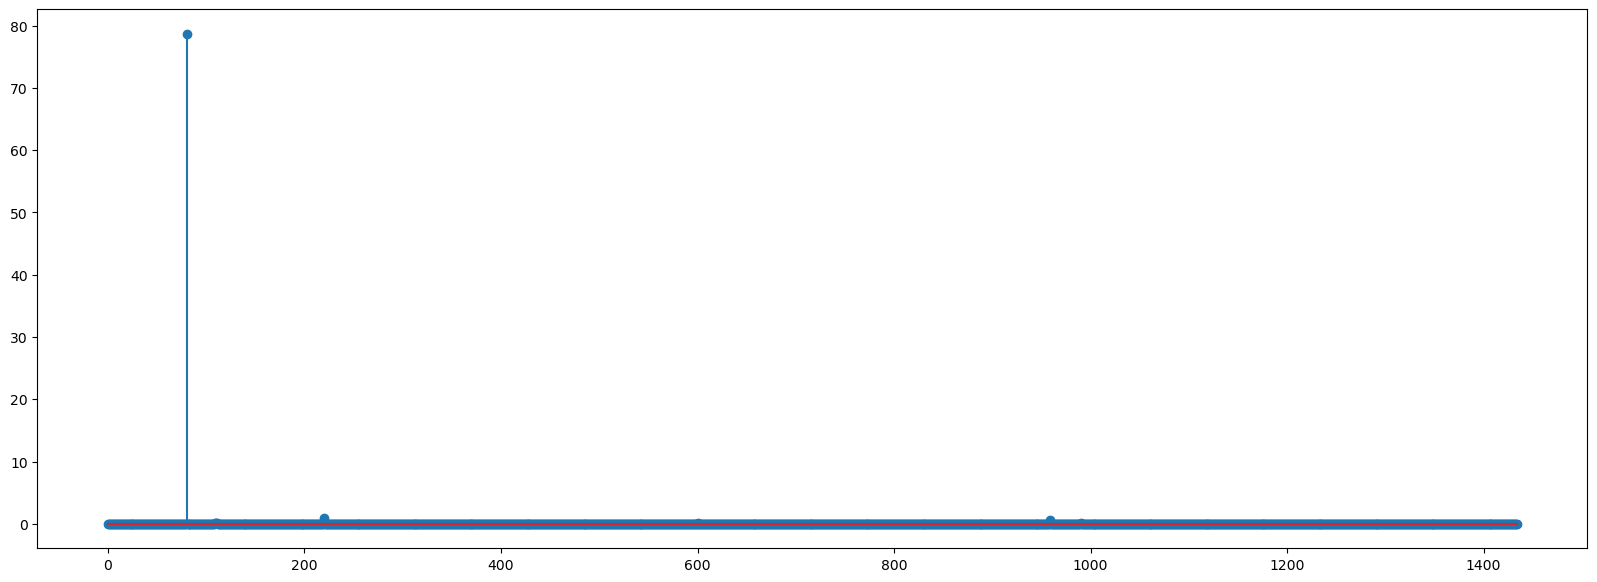

In [62]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df2)),np.round(c,1))

In [63]:
i = c>0.2

In [67]:
np.argmax(i)

80

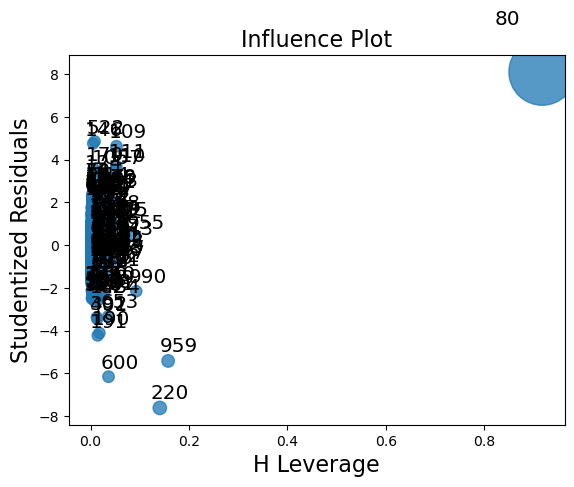

In [68]:
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(model1);

In [69]:
while np.max(c)>0.5 :
    model=smf.ols('Price~age+KM+HP+cc+Doors+Gears+qt+Weight',data=df1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df1=df1.drop(df1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df1
else:
    final_model=smf.ols('Price~age+KM+HP+cc+Doors+Gears+qt+Weight',data=df1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8894191849749751


In [70]:
final_model.rsquared

0.8894191849749751

In [71]:
predicted_price = final_model.predict()

In [72]:
predicted_price 

array([16351.01299145, 15891.82442076, 16334.02100667, ...,
        8681.6051495 ,  8793.70478205, 10863.42335921])

In [73]:
final_model_predicted=pd.DataFrame(df1,)
final_model_predicted['Predicted Price'] = predicted_price 


In [74]:
final_model_predicted

,age,KM,HP,cc,Doors,Gears,qt,Weight,Price,Predicted Price
0,23,46986,90,2000,3,5,210,1165,13500,16351.012991
1,23,72937,90,2000,3,5,210,1165,13750,15891.824421
2,24,41711,90,2000,3,5,210,1165,13950,16334.021007
3,26,48000,90,2000,3,5,210,1165,14950,16002.080259
4,30,38500,90,2000,3,5,210,1170,13750,15889.835926
...,...,...,...,...,...,...,...,...,...,...
1427,69,20544,86,1300,3,5,69,1025,7500,9161.797882
1428,72,19000,86,1300,3,5,69,1015,10845,8536.169181
1429,71,17016,86,1300,3,5,69,1015,8500,8681.605150
1430,70,16916,86,1300,3,5,69,1015,7250,8793.704782


In [75]:
# This is the best model which we have got .